# 2. Polynomial Regression

**Purpose:** Learn and revise **Polynomial Regression** using Scikit-learn.

---

## What is Polynomial Regression?

**Polynomial regression** fits a **polynomial** (curved) relationship between \( x \) and \( y \) instead of a straight line. We still use **linear regression** under the hood, but on **transformed features**: \( x, x^2, x^3, \ldots \).

Model:
\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_d x^d
\]

- **Degree \( d \):** Controls how "curved" the fit can be. Higher degree = more flexible, but risk of **overfitting**.
- **Key idea:** Same OLS as linear regression; we just add polynomial terms as new columns (e.g. with **PolynomialFeatures**).


## Concepts to Remember

| Concept                | Description                                                                              |
| ---------------------- | ---------------------------------------------------------------------------------------- |
| **PolynomialFeatures** | Transforms \( x \) into \( [1, x, x^2, x^3, ...] \) so LinearRegression can fit a curve. |
| **Degree**             | Higher = more wiggly fit; too high leads to overfitting on training data.                |
| **Pipeline**           | Combine PolynomialFeatures + LinearRegression so transform and fit happen together.      |
| **When to use**        | When the relationship between \( x \) and \( y \) is clearly non-linear (curved).        |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Non-linear data: quadratic trend + noise
np.random.seed(42)
X = np.linspace(0, 10, 80).reshape(-1, 1)
y = 1 + 2 * X.ravel() + 0.5 * X.ravel() ** 2 + np.random.randn(80) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
degree = 2  # Try 1 (linear), 2 (quadratic), 5 (risk overfitting)
model = Pipeline([("poly", PolynomialFeatures(degree=degree)), ("linear", LinearRegression())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Degree: {degree}")
print("MSE (test):", mean_squared_error(y_test, y_pred))
print("R² (test):", r2_score(y_test, y_pred))

Degree: 2
MSE (test): 6.671955973615457
R² (test): 0.9818178246955404


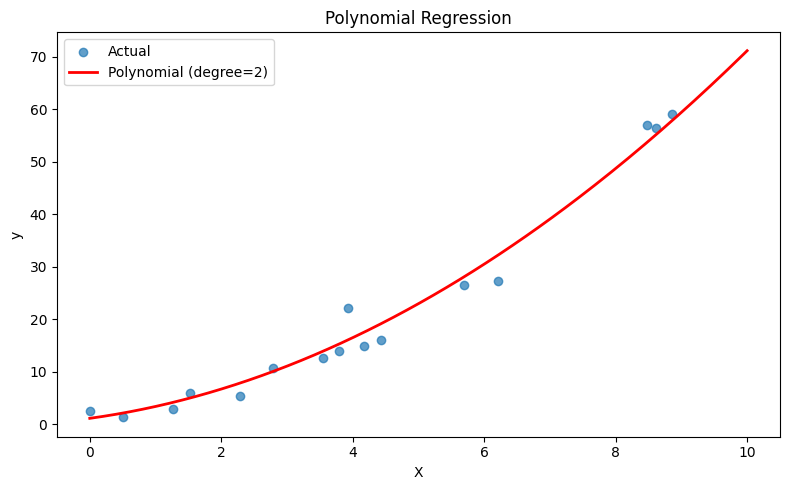

In [4]:
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.7, label="Actual")
plt.plot(X_plot, y_plot, color="red", linewidth=2, label=f"Polynomial (degree={degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.tight_layout()
plt.show()

## Key Takeaways

- Use **PolynomialFeatures(degree=d)** to create \( x, x^2, ..., x^d \); then fit **LinearRegression** (or use a **Pipeline**).
- **Degree** is the main hyperparameter: start with 2–3; increase only if needed and monitor overfitting.
- Polynomial regression is still "linear" in the **parameters** \( \beta \); only the **features** are non-linear.
